In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util,transform,measure

# Hu moments

array([  87.96479238, 7712.19940304])

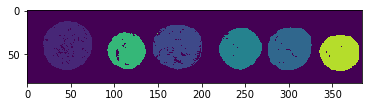

In [40]:
im=data.coins()[220:,:]
l=measure.label(im>100)

plt.imshow(l)

[array([  2.40660894,   5.24630046,  20.19594575,  22.56406014,
        481.63899484,  51.65814396,  -6.2300395 ]),
 array([ 1.77493418,  2.55093323,  4.03813517,  6.0589158 , 29.96967805,
         9.67707625, -0.05476048]),
 array([ 1.49522084e+01,  2.18918005e+02,  3.24898840e+03,  3.38787788e+03,
         1.12399841e+07,  5.01266160e+04, -1.51268597e+03]),
 array([ 4.73109338e+01,  2.22314557e+03,  1.04833396e+05,  1.06268941e+05,
         1.12165516e+10,  5.01060631e+06, -1.10153654e+05]),
 array([ 3.54370305e+01,  1.24463647e+03,  4.39194624e+04,  4.47082022e+04,
         1.98111332e+09,  1.57727875e+06, -2.34299284e+04]),
 array([2.65888889e+02, 7.06610494e+04, 1.88160778e+07, 1.88351112e+07,
        3.54582120e+14, 5.00677588e+09, 3.22481969e+08]),
 array([ 1.13016062e+01,  1.24184484e+02,  1.38739663e+03,  1.46685406e+03,
         2.09257328e+06,  1.63463418e+04, -1.61615249e+02]),
 array([2.28770000e+04, 5.23357129e+08, 1.19728410e+13, 1.19728410e+13,
        1.43348923e+26, 2

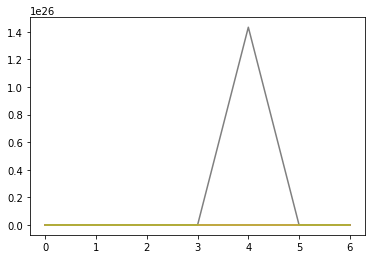

In [68]:
m=[]
for i in range(np.max(l)):
    mu = measure.moments(np.double(l==i))
    nu = measure.moments_normalized(mu)
    hu = measure.moments_hu(nu)
    m.append(hu)
    plt.plot(hu)
m

# PCA

/home/xing/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


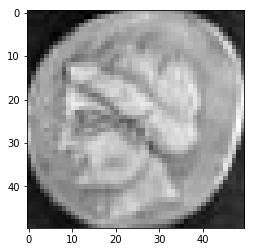

In [106]:
#plt.switch_backend('qt5agg')

im=data.coins();
l=measure.label(im>120);
s=[]
for i in range(1,l.max()):
    t=np.int8(l==i)
    if np.sum(t)>50 :
        x,y=np.nonzero(t)
        x1,x2,y1,y2=min(x),max(x),min(y),max(y)
        if np.abs((x2-x1)-(y2-y1))<10:
            s.append(transform.resize(im[x1:(x2+1),y1:(y2+1)],(50,50)))

plt.imshow(s[20])

In [108]:

x=np.zeros((2500,len(s)))
for i in range(len(s)):
    x[:,i]=np.reshape(s[i],2500)-s[i].mean()

xx=x.dot(x.T)
w,v=np.linalg.eig(xx)

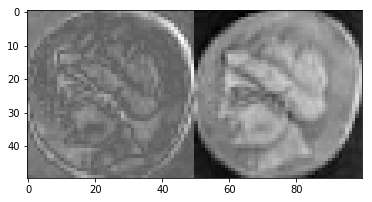

In [109]:
f=[]
d=21
plt.set_cmap('gray')
for i in range(len(s)):
    f.append(v[:,1:d].T.dot(np.reshape(s[i]-s[i].mean(),2500)))

m=np.abs(np.reshape(v[:,0],(50,50)))
plt.imshow(np.uint8(m/m.max()*255))
result=(np.uint8(100+300*np.reshape(np.abs(v[:,1:d].dot(f[20])),(50,50))))
plt.imshow(np.hstack((result,s[20]*255)))